# Plotting from geotables

In [1]:
%matplotlib inline

In [2]:
import pysal as ps
import numpy as np
from pysal.contrib import pdio
from pysal.contrib.viz import mapping as maps
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd

In [3]:
ps.examples.available()

['street_net_pts',
 'calemp',
 'columbus',
 'south',
 'arcgis',
 'chicago',
 'snow_maps',
 'juvenile',
 'geodanet',
 'wmat',
 'sids2',
 'Line',
 'taz',
 'desmith',
 'us_income',
 'book',
 'sacramento2',
 'Polygon',
 'stl',
 'mexico',
 'baltim',
 '10740',
 'Point',
 'virginia',
 'newHaven',
 'burkitt',
 'nat',
 'networks']

In [4]:
db = pdio.read_files(ps.examples.get_path('columbus.shp'))
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 21 columns):
AREA          49 non-null float64
PERIMETER     49 non-null float64
COLUMBUS_     49 non-null int64
COLUMBUS_I    49 non-null int64
POLYID        49 non-null int64
NEIG          49 non-null int64
HOVAL         49 non-null float64
INC           49 non-null float64
CRIME         49 non-null float64
OPEN          49 non-null float64
PLUMB         49 non-null float64
DISCBD        49 non-null float64
X             49 non-null float64
Y             49 non-null float64
NSA           49 non-null float64
NSB           49 non-null float64
EW            49 non-null float64
CP            49 non-null float64
THOUS         49 non-null float64
NEIGNO        49 non-null float64
geometry      49 non-null object
dtypes: float64(16), int64(4), object(1)
memory usage: 8.1+ KB


In [5]:
type(db.geometry[0])

pysal.cg.shapes.Polygon

In [6]:
maps.classifier

{'box_plot': pysal.esda.mapclassify.Box_Plot,
 'equal_interval': pysal.esda.mapclassify.Equal_Interval,
 'fisher_jenks': pysal.esda.mapclassify.Fisher_Jenks,
 'fisher_jenks_sampled': pysal.esda.mapclassify.Fisher_Jenks_Sampled,
 'headtail_breaks': pysal.esda.mapclassify.HeadTail_Breaks,
 'jenks_caspall': pysal.esda.mapclassify.Jenks_Caspall,
 'jenks_caspall_forced': pysal.esda.mapclassify.Jenks_Caspall_Forced,
 'jenks_caspall_sampled': pysal.esda.mapclassify.Jenks_Caspall_Sampled,
 'max_p_classifier': pysal.esda.mapclassify.Max_P_Classifier,
 'maximum_breaks': pysal.esda.mapclassify.Maximum_Breaks,
 'natural_breaks': pysal.esda.mapclassify.Natural_Breaks,
 'percentiles': pysal.esda.mapclassify.Percentiles,
 'quantiles': pysal.esda.mapclassify.Quantiles,
 'std_mean': pysal.esda.mapclassify.Std_Mean,
 'user_defined': pysal.esda.mapclassify.User_Defined}

## `matplotlib` interface

In [7]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
pal = sns.xkcd_palette(colors)

colors = np.array(pal)[np.random.random_integers(0, high=len(pal)-1, size=db.shape[0])]
colors = pd.Series(colors.tolist(), index=db.index)

/home/serge/anaconda3/envs/pysal2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead


In [8]:
pltt = maps.get_color_map(k=6)
pltt

['#EDF8FB', '#CCECE6', '#99D8C9', '#66C2A4', '#2CA25F', '#006D2C']

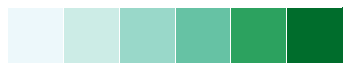

In [9]:
#pltt = sns.color_palette('viridis', 6)
sns.palplot(pltt)

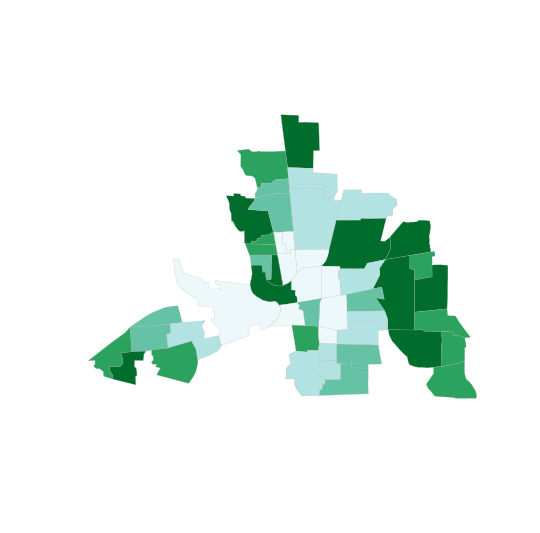

In [10]:
maps.geoplot(db, 'HOVAL')

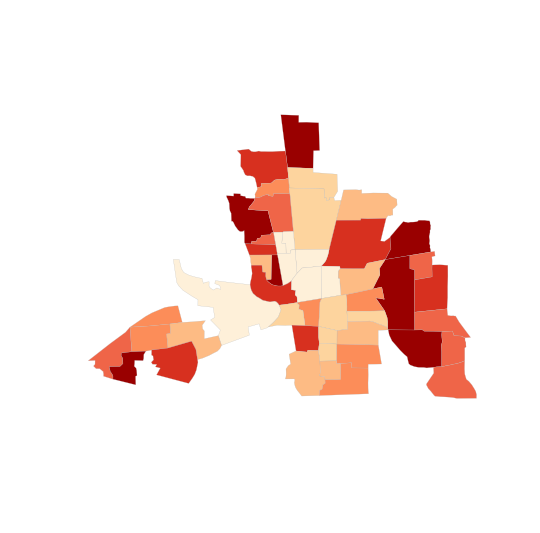

In [11]:
maps.geoplot(db, 'HOVAL', k=7, palette='OrRd')

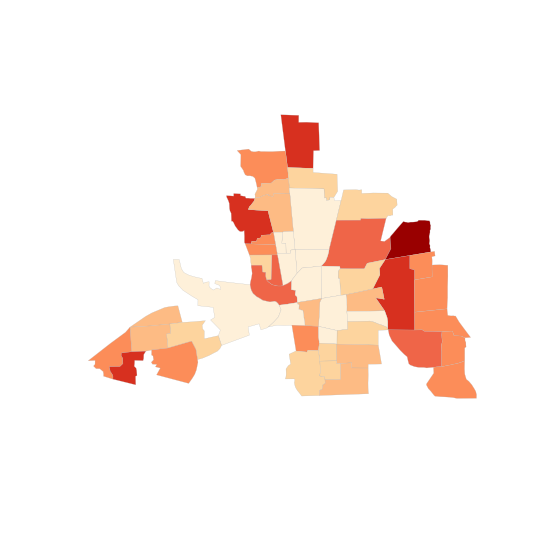

In [12]:
maps.geoplot(db, 'HOVAL', k=7, palette='OrRd', classi='fisher_jenks')

In [13]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'percentiles')
colors = colors.map({i:j for i,j in enumerate(pltt)})
colors.head()

0    #2CA25F
1    #66C2A4
2    #99D8C9
3    #99D8C9
4    #99D8C9
dtype: object

In [14]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'percentiles')
colors = colors.map({i:j for i,j in enumerate(pltt)})
colors.head()

0    #2CA25F
1    #66C2A4
2    #99D8C9
3    #99D8C9
4    #99D8C9
dtype: object

In [15]:
from mapping import classifier

In [16]:
q = classifier['quantiles'](y, k=3)
q.bins

array([ 27.733   ,  41.75    ,  96.400002])

In [17]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'fisher_jenks', k=6)
colors = colors.map({i:j for i,j in enumerate(pltt)})
colors.head()

0    #2CA25F
1    #99D8C9
2    #CCECE6
3    #CCECE6
4    #EDF8FB
dtype: object

In [18]:
classification.name

'Fisher_Jenks'

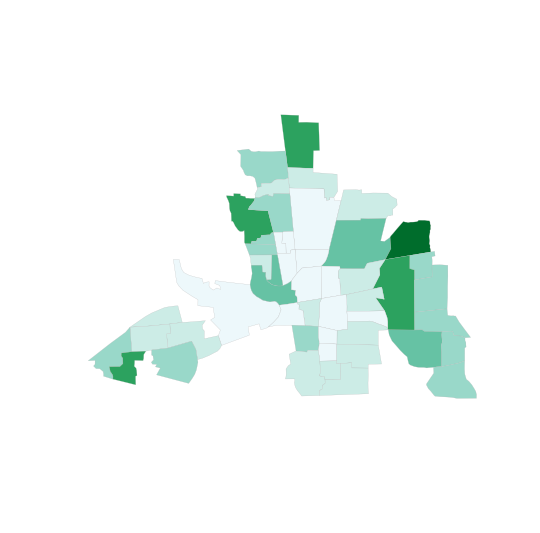

In [19]:
reload(maps);

maps.plot_geocol_mpl(db.loc[:, 'geometry'], facecolor=colors)

## `bokeh` interface

In [20]:
from bokeh.models import HoverTool
from bokeh.palettes import Viridis6
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [21]:
reload(maps)

maps.plot_geocol_bk(db['geometry'], marker_size=10, hover=True)

In [22]:
reload(maps)

maps.plot_geocol_bk(db['geometry'], marker_size=10, hover=True,\
                   facecolor=colors)

In [23]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk')

In [24]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks')

In [25]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd')

In [26]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd')

In [27]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd',\
             tips = ['CRIME']
            )

In [28]:
reload(maps)

maps.geoplot(db, col='CRIME' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd',\
             tips = ['HOVAL']
            )

In [29]:
gc = db['geometry']
patch_xs = []
patch_ys = []
ids = []
for idx, shape in gc.iteritems():
    for ring in shape.parts:
        xs, ys = zip(*ring)
        patch_xs.append(xs)
        patch_ys.append(ys)
        ids.append(idx)
cds = ColumnDataSource(data=dict(
            x=patch_xs,
            y=patch_ys
            ))

In [30]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [31]:
reload(maps);

maps.plot_geocol_bk(db.loc[:, 'geometry'], linewidth=10, facecolor=colors)

In [32]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [33]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [34]:
x = range(10)
y = range(100)

In [35]:
d = dict(f=x,l=y)

In [36]:
d

{'f': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'l': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99]}

In [37]:
db.index.values


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [38]:
db['HOVAL']

0     80.467003
1     44.567001
2     26.350000
3     33.200001
4     23.225000
5     28.750000
6     75.000000
7     37.125000
8     52.599998
9     96.400002
10    19.700001
11    19.900000
12    41.700001
13    42.900002
14    18.000000
15    18.799999
16    41.750000
17    60.000000
18    30.600000
19    81.266998
20    19.975000
21    30.450001
22    47.733002
23    53.200001
24    17.900000
25    20.299999
26    34.099998
27    22.850000
28    32.500000
29    22.500000
30    31.799999
31    40.299999
32    23.600000
33    28.450001
34    27.000000
35    36.299999
36    43.299999
37    22.700001
38    39.599998
39    61.950001
40    42.099998
41    44.333000
42    25.700001
43    33.500000
44    27.733000
45    76.099998
46    42.500000
47    26.799999
48    35.799999
Name: HOVAL, dtype: float64